## Question 1

Support Vector Machines (SVMs) are a class of supervised machine learning algorithms used for classification and regression tasks. In the case of linear SVMs, the decision boundary is a hyperplane that separates the data into different classes. The mathematical formula for a linear SVM can be expressed as follows:

f(x) = w.x + b

f(x) is the decision function 

w is the weight vector

x is the input feature vector

. denotes the dot product

b is the bias term

The classification rule is based on the sign of the decision function:

{  +1 if f(x) >=0
   -1 if f(x) < 0
  }
  


## Question 2

The objective function of a linear Support Vector Machine (SVM) involves finding the parameters (weight vector and bias) that define a hyperplane with the maximum margin between the classes. The SVM aims to minimize a specific objective function, which includes a regularization term to balance achieving a wide margin and avoiding misclassifications. The optimization problem for a linear SVM is typically formulated as follows:

Minimise ||w|| / 2

subject to the constraints:

yi * (w.xi + b) >= 1 for all training samples (xi, yi)

The regularization term, which encourages finding a hyperplane with a larger margin. The objective is to minimize the Euclidean norm of the weight vector w, effectively maximizing the margin.

yi * (w.xi + b) >= 1 constraints ensure that each data point is correctly classified and lies on the correct side of the decision boundary with a margin of at least 1. The class labels yi are either +1 or -1, and xi represents the feature vector of the i-th training sample.

## Question 3

The kernel trick is a technique used in Support Vector Machines (SVMs) to handle non-linear decision boundaries by implicitly mapping input data into a higher-dimensional space. It allows SVMs to operate in a space where a linear decision boundary corresponds to a non-linear decision boundary in the original feature space. The kernel trick is particularly useful when dealing with datasets that are not linearly separable.

The kernel trick involves replacing the dot product w⋅x with a non-linear function K(x,z) that computes the similarity between two data points x and z in a higher-dimensional space. The decision function then becomes:

f(x) = ∑ (i=1 to N) αi * yi * K(xi,x) +b

N is the number of support vectors,
αi are the Lagrange multipliers obtained during the optimization process,
yi is the class label of the i-th support vector,
xi is the i-th support vector.


A few popular kernels used are :

1. Linear Kernel : K(x,z) =x.z
Equivalent to the standard linear SVM useful for linearly seperable data points.

2. Polynomial Kernel : K(x,z) = (x.z + c)^d
Itroduces polynomial features and allows for decision boundaries of higher degrees.

3. Radial Basis Function(RBF) or Guassian Kernel : K(x,z) = exp( -||x-z||^2 / 2 * std^2)

Captures local patterns and is effective for non-linearly seperable data.

4. Sigmoid kernel : K(x,z) = tanh( αx .z + c)

## Question 4

Support vectors play a crucial role in Support Vector Machines (SVMs), influencing the construction of the decision boundary and defining the margin. In SVM, the decision boundary is determined by a subset of training instances called support vectors. These are the data points that lie closest to the decision boundary and have the most influence on the positioning and orientation of the boundary.

The decision boundary (hyperplane) of an SVM is determined by the support vectors. These vectors lie at the margins, and the hyperplane is positioned to maximize the margin, i.e., the distance between the hyperplane and the nearest support vectors. The margin is the distance between the decision boundary and the nearest data points from each class. The support vectors define this margin, and the SVM aims to maximize it during training.

In the case of non-linear decision boundaries (using the kernel trick), the support vectors are crucial for defining the decision boundary in the higher-dimensional feature space. They represent the key data points around which the non-linear decision surface is shaped.

## Question 5

Hyperplane:  The hyperplane is the decision boundary that separates the data points of different classes. In a two-dimensional space, it is a line, and in higher dimensions, it becomes a hyperplane.

Marginal Plane: The marginal plane refers to the planes parallel to the hyperplane but at a specified distance, known as the margin. Support vectors lie on these marginal planes.


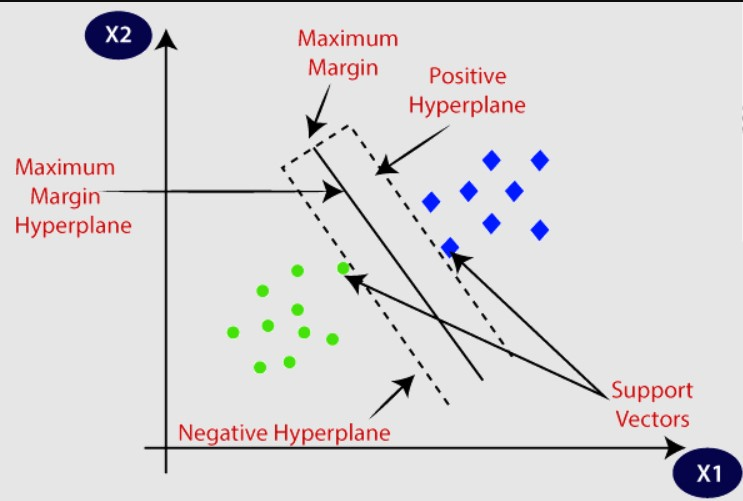

In [7]:
from IPython.display import Image
Image("C:/Users/HP/OneDrive/Desktop/svm1.jpg")


In the above image presented the black line represents the hyperplane and the dotted lines represent the positive nad negative hyperplane. The distance between the twomarginal planes is known as the margin and our objective is to maximise this margin so that two classes of data points are classified properly.


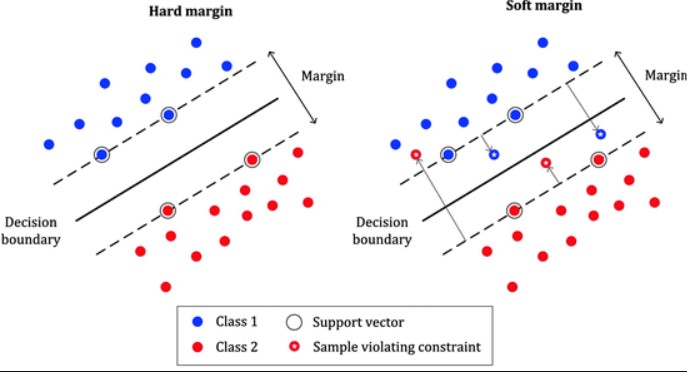

In [8]:
Image("C:/Users/HP/OneDrive/Desktop/svm2.jpg")


Hard Margin: A hard-margin SVM aims to find a hyperplane that perfectly separates the two classes, with no data points allowed in the margin. This can be challenging when the data is not linearly separable.

Soft Margin: A soft-margin SVM allows for some margin violations, introducing a trade-off between maximizing the margin and allowing for misclassifications. This is particularly useful when the data is not perfectly separable.

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np

dataset=load_iris()
df=pd.DataFrame(data=dataset.data,columns=dataset.feature_names)
df['target']=dataset.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
df['target'].unique()

array([0, 1, 2])

In [3]:
new_df=df[df['target']!=2]
X=new_df.iloc[:,:-1]
y=new_df.iloc[:,-1]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.22,random_state=42)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
svc=SVC(kernel='linear')
svc.fit(X_train_scaled,y_train)
y_pred=svc.predict(X_test_scaled)
print(confusion_matrix(y_test,y_pred))
print("accuracy score: ",accuracy_score(y_test,y_pred))
print("F1 score: ",f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[12  0]
 [ 0 10]]
accuracy score:  1.0
F1 score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        10

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



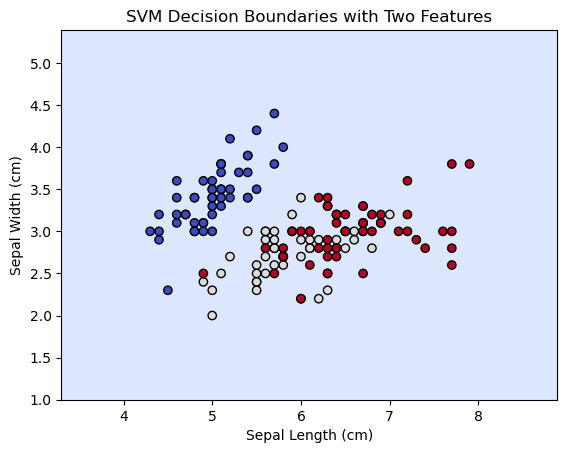

In [4]:
iris = load_iris()
X = iris.data[:, :2]  # Using only the first two features for visualization
y = iris.target
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('SVM Decision Boundaries with Two Features')
plt.show()

In [5]:
from sklearn.model_selection import GridSearchCV
param_grid={
    'C': [0.1,1,10,100,1000],
    'kernel':['linear']
}
gridcv=GridSearchCV(svc,param_grid=param_grid,cv=5,verbose=3)
gridcv.fit(X_train_scaled,y_train)

print("Best parameters: ",gridcv.best_params_)
gridcv.fit(X_train_scaled,y_train)
y_pred1=gridcv.predict(X_test_scaled)
print(accuracy_score(y_test,y_pred1))
print("accuracy: ",accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.708 total time=   0.0s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.750 total time=   0.0s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.875 total time=   0.0s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.833 total time=   0.0s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.708 total time=   0.0s
[CV 1/5] END ................C=1, kernel=linear;, score=0.667 total time=   0.0s
[CV 2/5] END ................C=1, kernel=linear;, score=0.750 total time=   0.0s
[CV 3/5] END ................C=1, kernel=linear;, score=0.875 total time=   0.0s
[CV 4/5] END ................C=1, kernel=linear;, score=0.833 total time=   0.0s
[CV 5/5] END ................C=1, kernel=linear;, score=0.708 total time=   0.0s
[CV 1/5] END ...............C=10, kernel=linear;, score=0.667 total time=   0.0s
[CV 2/5] END ...............C=10, kernel=linear;,